# Using LinearRegression for predicting uber fare price based on variable like distance, year, month, day, passenger count.


## Import Libraries 

In [80]:
import pandas as pd
import matplotlib.pyplot as mp
!pip install geopy
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

## Function Defination

In [2]:
def calculate_distance(data,O_lat,O_lon,D_lat,D_lon):
    df=data
    
    lat1 = radians(O_lat)
    
    lon1 = radians(O_lon)
    lat2 = radians(D_lat)
    lon2 = radians(D_lon)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    df.loc[i, 'distance'] = 6373.0*c

In [3]:
def show_box_plot(data,col):
    fig = mp.figure(figsize =(10, 7)) #defining figure size
    mp.boxplot(data[col])
    mp.show()

In [4]:

def get_iqr_range(data):
    Q1=data.quantile(0.1)
    Q3=data.quantile(0.99)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return upper_bound, lower_bound

def outlier_correction(data,col):
    upper_bound,lower_bound=get_iqr_range(data[col])
    
    data = data[(data[col] < upper_bound) & (data[col] > lower_bound)]
    return data   

## Import Data & Cleaning Data

In [5]:
df=pd.read_csv('uber.csv')
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])

In [7]:
df=df.drop(['Unnamed: 0','key'], axis=1)

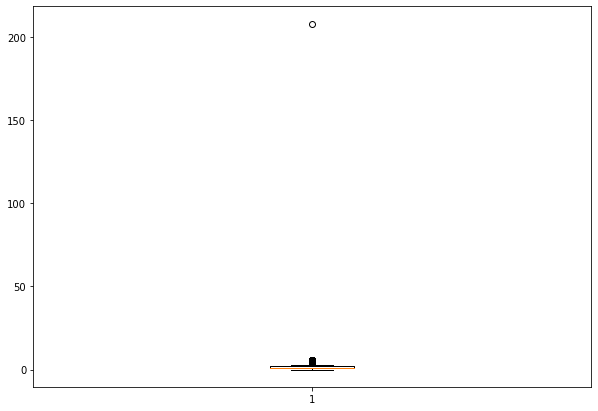

In [8]:
show_box_plot(df,"passenger_count")

In [9]:
df=df.loc[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 7)]

In [10]:
df=df.loc[(df['fare_amount'] >= 1)]

In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199265.000000,199265.000000,199265.000000,199265.000000,199265.000000,199265.000000
mean,11.369588,-72.530091,39.937170,-72.528120,39.925337,1.689449
std,9.905854,11.434318,7.723738,13.119145,6.794213,1.305394
min,2.500000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992065,40.734796,-73.991409,40.733828,1.000000
50%,8.500000,-73.981825,40.752584,-73.980095,40.753040,1.000000
75%,12.500000,-73.967160,40.767157,-73.963664,40.767995,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


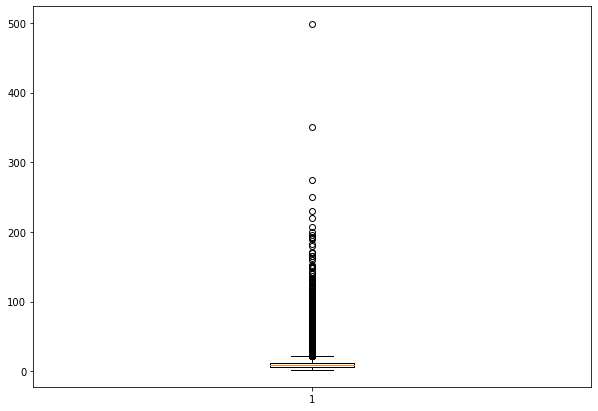

In [12]:
show_box_plot(df,"fare_amount")

In [13]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [14]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [15]:
len(df)

199265

In [16]:
df.dropna(inplace=True) 

In [17]:
len(df)

199265

In [18]:
df['month']=df[ "pickup_datetime"].dt.month
df['day']=df[ "pickup_datetime"].dt.day
df['year']=df[ "pickup_datetime"].dt.year

In [22]:
for i in range(len(df)):
    try:
        
        calculate_distance(df,df.loc[i,"pickup_latitude"],df.loc[i,"pickup_longitude"],df.loc[i,"dropoff_latitude"],df.loc[i,"dropoff_longitude"])
    except:
        pass

In [23]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,day,year,distance
count,199265.000000,199265.000000,199265.000000,199265.000000,199265.000000,199265.000000,199265.000000,199265.000000,199265.000000,198530.000000
mean,11.369588,-72.530091,39.937170,-72.528120,39.925337,1.689449,6.283512,15.705658,2011.743683,20.633159
std,9.905854,11.434318,7.723738,13.119145,6.794213,1.305394,3.438442,8.686813,1.859028,380.709825
min,2.500000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991409,40.733828,1.000000,3.000000,8.000000,2010.000000,1.215680
50%,8.500000,-73.981825,40.752584,-73.980095,40.753040,1.000000,6.000000,16.000000,2012.000000,2.122035
75%,12.500000,-73.967160,40.767157,-73.963664,40.767995,2.000000,9.000000,23.000000,2013.000000,3.877289
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000,12.000000,31.000000,2015.000000,16414.390364


In [24]:
df=df. dropna() 
df=df.loc[(df['distance'] > 0)]

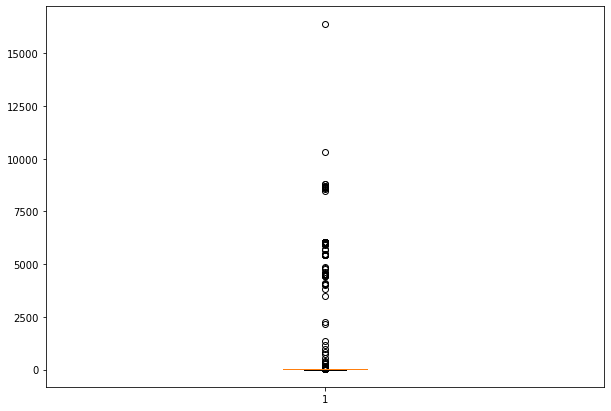

None


In [25]:
print(show_box_plot(df,"distance"))

In [26]:
df2=outlier_correction(df,"distance")
df2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,day,year,distance
count,192452.000000,192452.000000,192452.000000,192452.000000,192452.000000,192452.00000,192452.000000,192452.000000,192452.000000,192452.000000
mean,11.349341,-73.910168,40.689904,-73.909193,40.688348,1.68959,6.283250,15.705620,2011.746529,3.351980
std,9.709433,2.694953,2.763934,2.695041,2.639361,1.30516,3.439722,8.687367,1.862706,3.597288
min,2.500000,-75.387785,-74.015515,-75.417737,-74.015750,1.00000,1.000000,1.000000,2009.000000,0.000084
25%,6.000000,-73.992279,40.736437,-73.991600,40.735313,1.00000,3.000000,8.000000,2010.000000,1.280196
50%,8.500000,-73.982131,40.753282,-73.980567,40.753735,1.00000,6.000000,16.000000,2012.000000,2.180383
75%,12.500000,-73.968460,40.767522,-73.965523,40.768320,2.00000,9.000000,23.000000,2013.000000,3.938506
max,499.000000,40.808425,401.066667,40.831932,45.031598,6.00000,12.000000,31.000000,2015.000000,49.019114


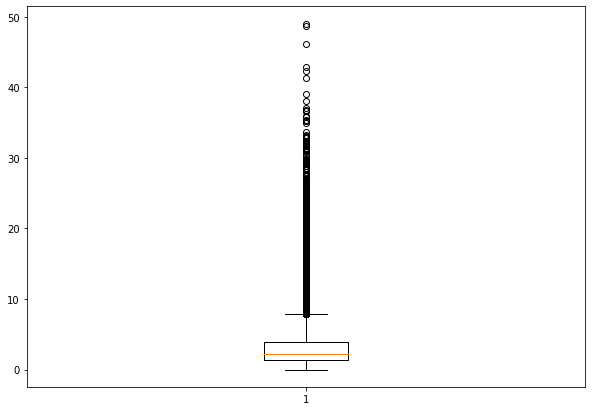

None


In [27]:
print(show_box_plot(df2,"distance"))

### Correlation- plotting the correation between different feature 

In [28]:
correaltion_matrix=df2.corr(method='pearson').round(2)
correaltion_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,day,year,distance
fare_amount,1.00,0.01,-0.01,0.01,-0.01,0.01,0.02,0.00,0.12,0.87
pickup_longitude,0.01,1.00,-0.95,1.00,-0.99,0.01,-0.01,0.02,0.01,0.01
pickup_latitude,-0.01,-0.95,1.00,-0.95,0.95,-0.01,0.01,-0.02,-0.01,0.00
dropoff_longitude,0.01,1.00,-0.95,1.00,-0.99,0.01,-0.01,0.02,0.01,0.00
dropoff_latitude,-0.01,-0.99,0.95,-0.99,1.00,-0.01,0.01,-0.02,-0.01,-0.00
passenger_count,0.01,0.01,-0.01,0.01,-0.01,1.00,0.01,0.00,0.01,0.01
month,0.02,-0.01,0.01,-0.01,0.01,0.01,1.00,-0.02,-0.12,0.01
day,0.00,0.02,-0.02,0.02,-0.02,0.00,-0.02,1.00,-0.01,0.00
year,0.12,0.01,-0.01,0.01,-0.01,0.01,-0.12,-0.01,1.00,0.03
distance,0.87,0.01,0.00,0.00,-0.00,0.01,0.01,0.00,0.03,1.00


<AxesSubplot:>

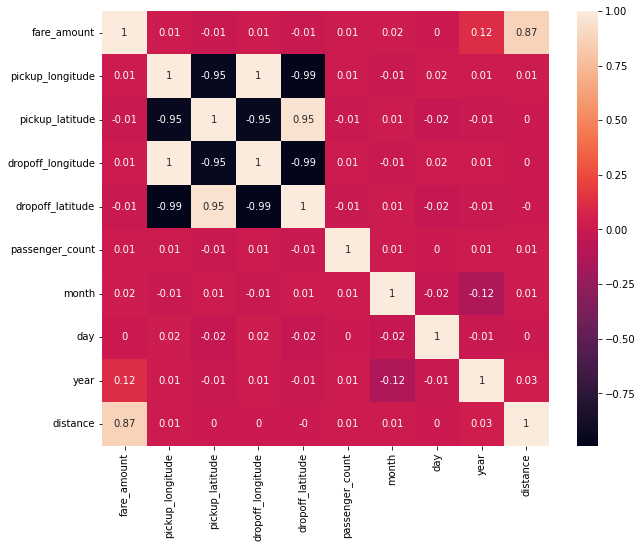

In [29]:
mp.figure(figsize=(10,8))
sns.heatmap(df2.corr().round(2),annot=True)

#### Based on heatmap, we can infer that distance and year has correaltion to fare_amount

Getting feature and target variable 

Identifying a subset of the available features that are most relevant to the fare_amount

In [81]:
X=df2[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','month','day','year','distance']]


Y=df2[['fare_amount']]

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

#### Model Building

In [83]:
model=LinearRegression()
model_fit=model.fit(X_train,y_train)

#### Calculate r2 score of model

In [84]:
accuracy=model.score(X_test,y_test)
print(accuracy*100)
y_pred=model.predict(X_test)

77.26223915930763


In [86]:
r2_score=r2_score(y_test,y_pred)
print((r2_score)*100)

77.26223915930763


An R-squared value of ~77% suggests that the model is a good fit for the data, and that the model's predictions are able to account for a large portion of the variation in the target variable.